In [1]:
# Imports
import re
import json
import folium
import geopandas as gpd
from folium.plugins import HeatMap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime 
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

from edinburgh_challenge.constants import police_stations, police_stations_dict, Location
from edinburgh_challenge.utility import generate_early_shift_distributions, bng_to_latlong
from edinburgh_challenge.models import NaiveModel, GreedyModel, EnhancedModel, SimplifiedModelNotBest, SimplifiedModel, ClosestPoliceStationModel
from edinburgh_challenge.simulation import *
from edinburgh_challenge.processing import *

In [2]:
start_date="01-01-2023"

In [3]:
estates_df = load_estates_df()
ps_coords, shift_distribution, shift_distribution_weekend, police_stations_dict, police_stations = generate_simulation_specs(estates_df)

In [4]:
max_custody_df = load_max_custody_df()
custody_df, custody_inds_df = process_custody_df(max_custody_df, start_date=start_date)

In [5]:
# Load the incidents data
incidents_df = load_incidents_df()
avg_deployment_df = load_deployment_df()

# Incidents File preprocessing
incidents_data = preprocess_incidents(incidents_df, avg_deployment_df, ps_coords, n_values=600000, start_date=start_date)

In [6]:
del avg_deployment_df, estates_df

### 1 Year Run of simulation

In [7]:
# Running the best model
simulation = Simulator(incidents_data, 
                       police_stations, 
                       shift_distribution, 
                       shift_distribution_weekend,
                       custody_df,
                       custody_inds_df,
                       n_days=365,
                       verbose=-1)


greedy_model = GreedyModel(shift_distribution, police_stations_dict)
closest_ps_model = ClosestPoliceStationModel(shift_distribution, police_stations_dict)

In [8]:
simulation.run(greedy_model)

day=1 self.current_shift='Night' no_of_officers=1128
day=1 self.current_shift='Early' no_of_officers=745
day=1 self.current_shift='Day' no_of_officers=1903
day=2 self.current_shift='Night' no_of_officers=1128
day=2 self.current_shift='Early' no_of_officers=745
day=2 self.current_shift='Day' no_of_officers=1903
day=3 self.current_shift='Night' no_of_officers=1128
day=3 self.current_shift='Early' no_of_officers=745
day=3 self.current_shift='Day' no_of_officers=1903
day=4 self.current_shift='Night' no_of_officers=1128
day=4 self.current_shift='Early' no_of_officers=745
day=4 self.current_shift='Day' no_of_officers=1903
day=5 self.current_shift='Night' no_of_officers=1903
day=5 self.current_shift='Early' no_of_officers=2648
day=5 self.current_shift='Early' no_of_officers=2648
day=6 self.current_shift='Night' no_of_officers=2648
day=6 self.current_shift='Early' no_of_officers=3393
day=6 self.current_shift='Early' no_of_officers=3393
day=7 self.current_shift='Night' no_of_officers=4524
day=7

day=52 self.current_shift='Day' no_of_officers=1903
day=53 self.current_shift='Night' no_of_officers=1128
day=53 self.current_shift='Early' no_of_officers=745
day=53 self.current_shift='Day' no_of_officers=1903
day=54 self.current_shift='Night' no_of_officers=1128
day=54 self.current_shift='Early' no_of_officers=745
day=54 self.current_shift='Day' no_of_officers=1903
day=55 self.current_shift='Night' no_of_officers=1128
day=55 self.current_shift='Early' no_of_officers=745
day=55 self.current_shift='Day' no_of_officers=1903
day=56 self.current_shift='Night' no_of_officers=1128
day=56 self.current_shift='Early' no_of_officers=745
day=56 self.current_shift='Day' no_of_officers=1903
day=57 self.current_shift='Night' no_of_officers=1128
day=57 self.current_shift='Early' no_of_officers=745
day=57 self.current_shift='Day' no_of_officers=1903
day=58 self.current_shift='Night' no_of_officers=1128
day=58 self.current_shift='Early' no_of_officers=745
day=58 self.current_shift='Day' no_of_officers

day=104 self.current_shift='Early' no_of_officers=745
day=104 self.current_shift='Day' no_of_officers=1903
day=105 self.current_shift='Night' no_of_officers=1128
day=105 self.current_shift='Early' no_of_officers=745
day=105 self.current_shift='Day' no_of_officers=1903
day=106 self.current_shift='Night' no_of_officers=1128
day=106 self.current_shift='Early' no_of_officers=745
day=106 self.current_shift='Day' no_of_officers=1903
day=107 self.current_shift='Night' no_of_officers=1128
day=107 self.current_shift='Early' no_of_officers=745
day=107 self.current_shift='Day' no_of_officers=1903
day=108 self.current_shift='Night' no_of_officers=1128
day=108 self.current_shift='Early' no_of_officers=745
day=108 self.current_shift='Day' no_of_officers=1903
day=109 self.current_shift='Night' no_of_officers=1128
day=109 self.current_shift='Early' no_of_officers=745
day=109 self.current_shift='Day' no_of_officers=1903
day=110 self.current_shift='Night' no_of_officers=1128
day=110 self.current_shift='

day=155 self.current_shift='Night' no_of_officers=1128
day=155 self.current_shift='Early' no_of_officers=745
day=155 self.current_shift='Day' no_of_officers=1903
day=156 self.current_shift='Night' no_of_officers=1128
day=156 self.current_shift='Early' no_of_officers=745
day=156 self.current_shift='Day' no_of_officers=1903
day=157 self.current_shift='Night' no_of_officers=1128
day=157 self.current_shift='Early' no_of_officers=745
day=157 self.current_shift='Day' no_of_officers=1903
day=158 self.current_shift='Night' no_of_officers=1128
day=158 self.current_shift='Early' no_of_officers=745
day=158 self.current_shift='Day' no_of_officers=1903
day=159 self.current_shift='Night' no_of_officers=1128
day=159 self.current_shift='Early' no_of_officers=745
day=159 self.current_shift='Day' no_of_officers=1903
day=160 self.current_shift='Night' no_of_officers=1128
day=160 self.current_shift='Early' no_of_officers=745
day=160 self.current_shift='Day' no_of_officers=1903
day=161 self.current_shift='

day=205 self.current_shift='Day' no_of_officers=1903
day=206 self.current_shift='Night' no_of_officers=1128
day=206 self.current_shift='Early' no_of_officers=745
day=206 self.current_shift='Day' no_of_officers=1903
day=207 self.current_shift='Night' no_of_officers=1128
day=207 self.current_shift='Early' no_of_officers=745
day=207 self.current_shift='Day' no_of_officers=1903
day=208 self.current_shift='Night' no_of_officers=1128
day=208 self.current_shift='Early' no_of_officers=745
day=208 self.current_shift='Day' no_of_officers=1903
day=209 self.current_shift='Night' no_of_officers=1128
day=209 self.current_shift='Early' no_of_officers=745
day=209 self.current_shift='Day' no_of_officers=1903
day=210 self.current_shift='Night' no_of_officers=1128
day=210 self.current_shift='Early' no_of_officers=745
day=210 self.current_shift='Day' no_of_officers=1903
day=211 self.current_shift='Night' no_of_officers=1128
day=211 self.current_shift='Early' no_of_officers=745
day=211 self.current_shift='

day=256 self.current_shift='Early' no_of_officers=745
day=256 self.current_shift='Day' no_of_officers=1903
day=257 self.current_shift='Night' no_of_officers=1128
day=257 self.current_shift='Early' no_of_officers=745
day=257 self.current_shift='Day' no_of_officers=1903
day=258 self.current_shift='Night' no_of_officers=1128
day=258 self.current_shift='Early' no_of_officers=745
day=258 self.current_shift='Day' no_of_officers=1903
day=259 self.current_shift='Night' no_of_officers=1128
day=259 self.current_shift='Early' no_of_officers=745
day=259 self.current_shift='Day' no_of_officers=1903
day=260 self.current_shift='Night' no_of_officers=1128
day=260 self.current_shift='Early' no_of_officers=745
day=260 self.current_shift='Day' no_of_officers=1903
day=261 self.current_shift='Night' no_of_officers=1128
day=261 self.current_shift='Early' no_of_officers=745
day=261 self.current_shift='Day' no_of_officers=1903
day=262 self.current_shift='Night' no_of_officers=1128
day=262 self.current_shift='

day=307 self.current_shift='Night' no_of_officers=1128
day=307 self.current_shift='Early' no_of_officers=745
day=307 self.current_shift='Day' no_of_officers=1903
day=308 self.current_shift='Night' no_of_officers=1128
day=308 self.current_shift='Early' no_of_officers=745
day=308 self.current_shift='Day' no_of_officers=1903
day=309 self.current_shift='Night' no_of_officers=1128
day=309 self.current_shift='Early' no_of_officers=745
day=309 self.current_shift='Day' no_of_officers=1903
day=310 self.current_shift='Night' no_of_officers=1128
day=310 self.current_shift='Early' no_of_officers=745
day=310 self.current_shift='Day' no_of_officers=1903
day=311 self.current_shift='Night' no_of_officers=1128
day=311 self.current_shift='Early' no_of_officers=745
day=311 self.current_shift='Day' no_of_officers=1903
day=312 self.current_shift='Night' no_of_officers=1128
day=312 self.current_shift='Early' no_of_officers=745
day=312 self.current_shift='Day' no_of_officers=1903
day=313 self.current_shift='

day=357 self.current_shift='Day' no_of_officers=1903
day=358 self.current_shift='Night' no_of_officers=1128
day=358 self.current_shift='Early' no_of_officers=745
day=358 self.current_shift='Day' no_of_officers=1903
day=359 self.current_shift='Night' no_of_officers=1128
day=359 self.current_shift='Early' no_of_officers=745
day=359 self.current_shift='Day' no_of_officers=1903
day=360 self.current_shift='Night' no_of_officers=1128
day=360 self.current_shift='Early' no_of_officers=745
day=360 self.current_shift='Day' no_of_officers=1903
day=361 self.current_shift='Night' no_of_officers=1128
day=361 self.current_shift='Early' no_of_officers=745
day=361 self.current_shift='Day' no_of_officers=1903
day=362 self.current_shift='Night' no_of_officers=1128
day=362 self.current_shift='Early' no_of_officers=745
day=362 self.current_shift='Day' no_of_officers=1903
day=363 self.current_shift='Night' no_of_officers=1128
day=363 self.current_shift='Early' no_of_officers=745
day=363 self.current_shift='

In [9]:
simulation.analyze_simulation_results()

{'Completion Percentages': {'Immediate': 100.0,
  'Prompt': 100.0,
  'Standard': 100.0,
  'Other resolution': 100.0},
 'Mean Response Times': {'Immediate': 0.48454610290205086,
  'Prompt': 0.5232893407797838,
  'Standard': 0.4713780777583735,
  'Other resolution': 0.49948830207237727},
 'Mean Deployment Times': {'Immediate': 1.8798634276909392,
  'Prompt': 2.8132219315048674,
  'Standard': 5.605359838026873,
  'Other resolution': 4.351890109432864},
 'Threshold Compliance': {'Immediate': 13.61275257338925,
  'Prompt': 74.9887496366033,
  'Standard': 100.0,
  'Other resolution': 100.0},
 'Mean Officer Hours': 851.6361519279523,
 'Unresolved Incident Percentage': 0.0}

In [10]:
simulation.check_simulation()

({'Officer_station_1_Weekday_Early_0': [8.295597607486789,
   9.587823655952056,
   12.328290740240318,
   13.328516193360018,
   14.269017387668686,
   16.626215204450123,
   33.76779787204666,
   35.01232298052378,
   38.934894904005425,
   41.219126405636416,
   58.439063184564304,
   62.44048463945347,
   63.333789205071426,
   80.74866688730619,
   82.2846932666579,
   84.78649636538931,
   87.20748376971125,
   152.45641628688406,
   153.32663282995375,
   160.09735871667255,
   176.09535907024286,
   182.52967034294684,
   203.65590076049182,
   207.5270857584605,
   224.0506558714926,
   226.64479622071195,
   229.2993365895642,
   232.33296282572496,
   252.12239562508248,
   255.06811917728362,
   275.4085392806548,
   276.24955434898584,
   281.9406538096894,
   298.3695120891357,
   301.1844100107893,
   305.92319631000925,
   323.21530656860443,
   325.8530305676988,
   326.30827278951506,
   329.4806027979876,
   347.131750870153,
   350.9597873572788,
   354.100958820183

In [95]:
simulation.df.to_csv("outcomes/simulation_1_year_results.csv")

NameError: name 'simulation' is not defined

In [12]:
del simulation

In [13]:
del custody_df, custody_inds_df

In [17]:
del incidents_data, incidents_df

## Read Resolved Data

In [9]:
!ls outcomes/simulation_results/simulation_365_closest_ps_results.csv

outcomes/simulation_results/simulation_365_closest_ps_results.csv


In [10]:
data = pd.read_csv("outcomes/simulation_results/simulation_365_closest_ps_results.csv")

In [11]:
resolved_incidents = data[data["resolved"]==True]

In [12]:
resolved_incidents.shape

(384538, 89)

### Where the closest police stations the ones that resolved the incidents?

In [13]:
# Extracting the resolving station
def extract_station_x(input_string):
    match = re.search(r'Officer_(station_\d+)_', input_string)
    return match.group(1) if match else None

resolved_incidents["resolved_station"] = resolved_incidents["resolving_officer"].apply(extract_station_x)


In [14]:
# Extracting the closest station
station_columns = [col for col in resolved_incidents.columns if col.startswith('station_') and col != 'station_x']

# Find the minimum value across these columns for each row
resolved_incidents['closest_station'] = resolved_incidents[station_columns].idxmin(axis=1)

In [15]:
resolved_incidents.head()

urn  latitude  longitude  day  hour  time   priority  \
0  PS-20221226-0002   55.6470   -4.74083    1     0     0     Prompt   
1  PS-20221226-0005   55.6369   -4.75306    1     0     0  Immediate   
2  PS-20221226-0007   55.6360   -4.75625    1     0     0     Prompt   
3  PS-20221226-0008   56.0339   -4.54617    1     0     0     Prompt   
4  PS-20221226-0012   55.8720   -4.29979    1     0     0     Prompt   

   deployment_time  station_1  station_2  ...  resolved  \
0         0.216667  24.885015  17.238052  ...      True   
1         0.333333  25.692636  18.044414  ...      True   
2         1.050000  25.828422  18.180290  ...      True   
3         1.300000  16.481523  17.241841  ...      True   
4         2.616667   2.438922   6.091903  ...      True   

                    resolving_officer  allocation_time  response_time  \
0  Officer_station_63_Weekday_Night_1              0.0       0.063669   
1  Officer_station_63_Weekday_Night_0              0.0       0.041018   
2  Officer_station_63_Weekday_Night_3              0.0       0.036634   
3  Officer_station_25_Weekday_Night_0              0.0       0.199150   
4  Officer_station_15_Weekday_Night_1              0.0       0.024416   

   resolution_time  police_station               name  division  \
0         0.344005      station_63          Saltcoats         U   
1         0.415369      station_63          Saltcoats         U   
2         1.123267      station_63          Saltcoats         U   
3         1.698300      station_25          Dumbarton         L   
4         2.665498      station_15  West End, Glasgow         G   

   resolved_station  closest_station  
0        station_63       station_63  
1        station_63       station_63  
2        station_63       station_63  
3        station_25       station_25  
4        station_15       station_15  

[5 rows x 91 columns]

In [16]:
# Testing the assumption that the closest station resolves
# the cases
n_resolved_incidents = resolved_incidents.shape[0]
print(f"Number of resolved incidents: {n_resolved_incidents}")

n_closest_station_resolved = np.sum(resolved_incidents["closest_station"] == resolved_incidents["resolved_station"])
print(f"Number of resolved incidents by closest station: {n_closest_station_resolved}")
print(f"Percentage: {(n_closest_station_resolved/n_resolved_incidents)*100}")

Number of resolved incidents: 384538
Number of resolved incidents by closest station: 384538
Percentage: 100.0


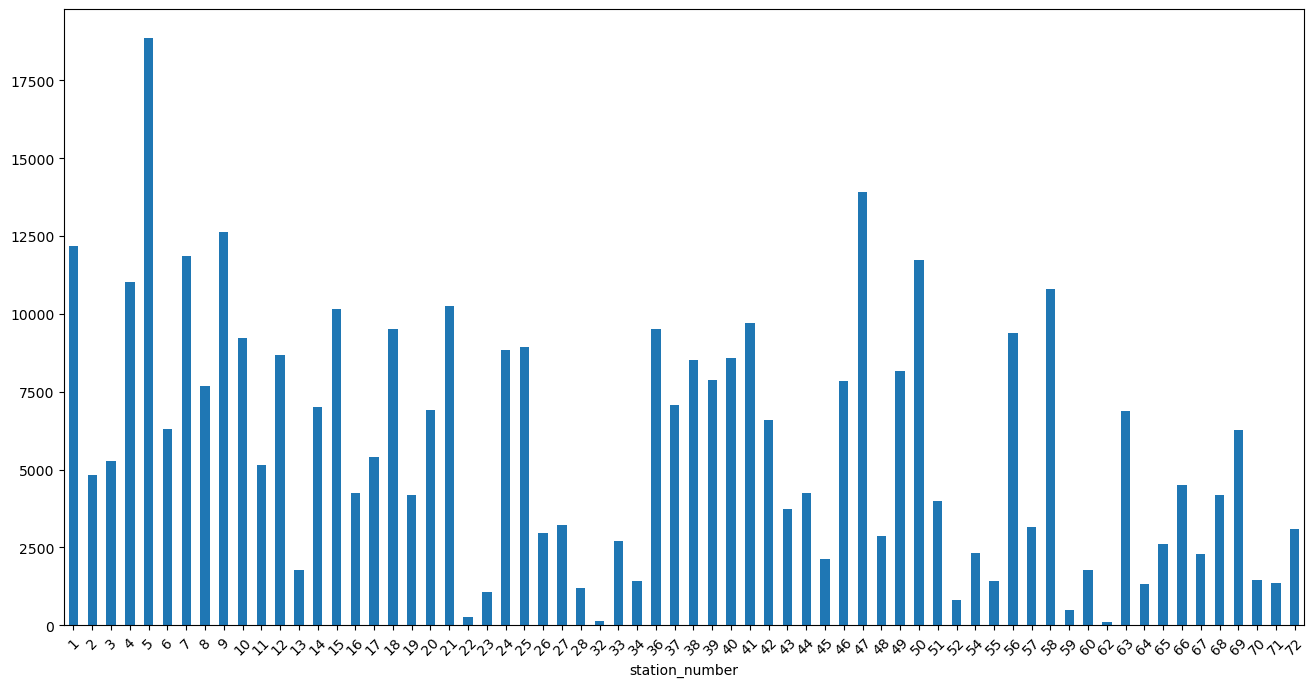

In [18]:
# There isn't a better way of doing this 
n_resolved_by_stations = resolved_incidents.groupby("resolved_station")["urn"].count()
n_resolved_by_stations = n_resolved_by_stations.reset_index()
n_resolved_by_stations.columns = ['station', 'value']
n_resolved_by_stations['station_number'] = n_resolved_by_stations['station'].str.extract(r'station_(\d+)').astype(int)

# Sort the DataFrame by the numeric part of the station
n_resolved_by_stations = n_resolved_by_stations.sort_values(by='station_number')

# Create a sorted Series from the DataFrame
n_resolved_by_stations = pd.Series(n_resolved_by_stations['value'].values, index=n_resolved_by_stations['station_number'])

plt.figure(figsize=(16, 8))

n_resolved_by_stations.plot.bar()
plt.xticks(rotation=45)
plt.savefig("outcomes/resolved_incidents_per_station_365.png")
plt.show()

In [19]:
n_resolved_by_stations.head()

station_number
1    12185
2     4810
3     5276
4    11012
5    18849
dtype: int64

In [20]:
n_resolved_by_stations.head()

station_number
1    12185
2     4810
3     5276
4    11012
5    18849
dtype: int64

In [21]:
n_resolved_by_stations_new = n_resolved_by_stations.copy()
for ps in police_stations:
    station_no = int(ps.simulation_name.replace("station_", ""))
    if station_no not in n_resolved_by_stations:
        n_resolved_by_stations_new = n_resolved_by_stations_new.append(pd.Series([0], [station_no]))

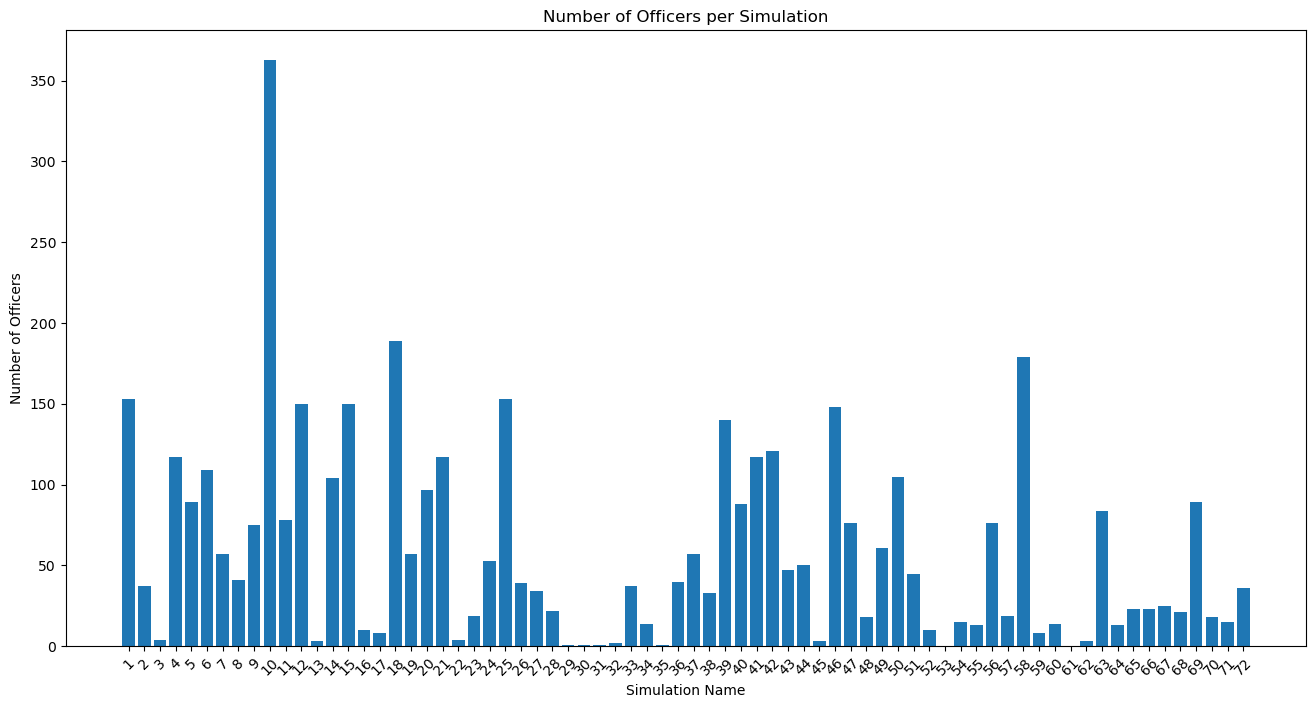

In [22]:
# Number of officers per shift
ps_dict = {ps.simulation_name: ps.n_officers for ps in police_stations}

# Extract and sort by the numeric part of the simulation_name
sorted_ps_dict = dict(sorted(ps_dict.items(), key=lambda item: int(item[0].split('_')[1])))

# Extract keys and values for plotting
ps_names = list(sorted_ps_dict.keys())
ps_names = [n.replace("station_", "") for n in ps_names]
n_officers = list(sorted_ps_dict.values())

# Create the bar plot
plt.figure(figsize=(16, 8))
plt.bar(ps_names, n_officers)
plt.xlabel('Simulation Name')
plt.ylabel('Number of Officers')
plt.title('Number of Officers per Simulation')
plt.xticks(rotation=45)
plt.savefig("outcomes/no_officer_per_station.png")
plt.show()


The assumption that the nearest station is assigned anyway is not held true. This must be changed. 

### The current platform – If Police Scotland continued to maintain it’s existing property portfolio, how is policing time being spent between travel to/from incidents and in these buildings?

### Heatmap of the incidents and the police station hotspots

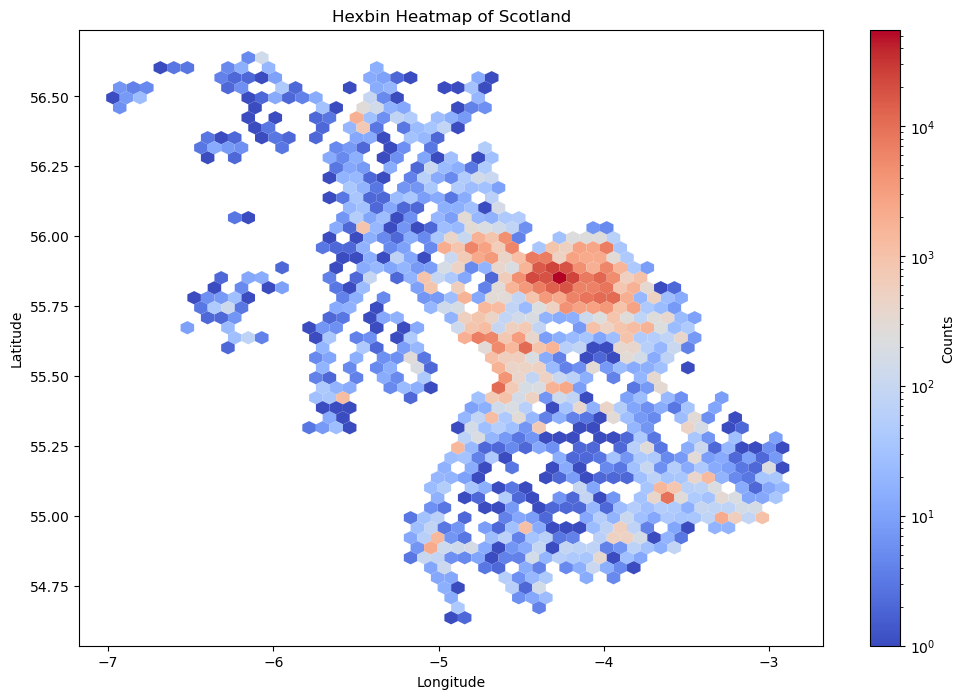

In [33]:
# Create a hexbin plot
# Measuring the model's allocation

# Create a Pandas DataFrame from PS instances
ps_data = {
    'y': [ps.location.y for ps in police_stations],
    'x': [ps.location.x for ps in police_stations],
    'division': [ps.division for ps in police_stations],
    "name":[ps.name for ps in police_stations],
    "simulation_name":[ps.simulation_name for ps in police_stations]
}
ps_df = pd.DataFrame(ps_data)
ps_df["n_resolved"] = n_resolved_by_stations_new.values
ps_df = ps_df.sort_values("n_resolved", ascending=True)

plt.figure(figsize=(12, 8))
hb = plt.hexbin(
    data['longitude'], 
    data['latitude'], 
    gridsize=50,  # Adjust this value for finer/coarser bins
    cmap='coolwarm', 
    mincnt=1,  # Only display bins with at least 1 point
    edgecolors='none',   # Remove hexagon edges for cleaner look
    norm=mpl.colors.LogNorm()
)

# Plot PS points from the DataFrame
#ax = sns.scatterplot(x="y", y="x", marker='o', edgecolor='black', s=100,
#               data=ps_df, hue="n_resolved", palette="viridis", alpha=0.8)
#norm = plt.Normalize(ps_df['n_resolved'].min(), ps_df['n_resolved'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

#for division, group in ps_df.groupby('division'):
#    plt.scatter(group['y'], group['x'], label=division, marker='o', edgecolor='black', s=100)

# Add legend for PS divisions
#plt.legend(title='Division', loc='upper right')

plt.colorbar(hb, label='Counts')
plt.title('Hexbin Heatmap of Scotland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("outcomes/geographical_demand.png")
plt.show()

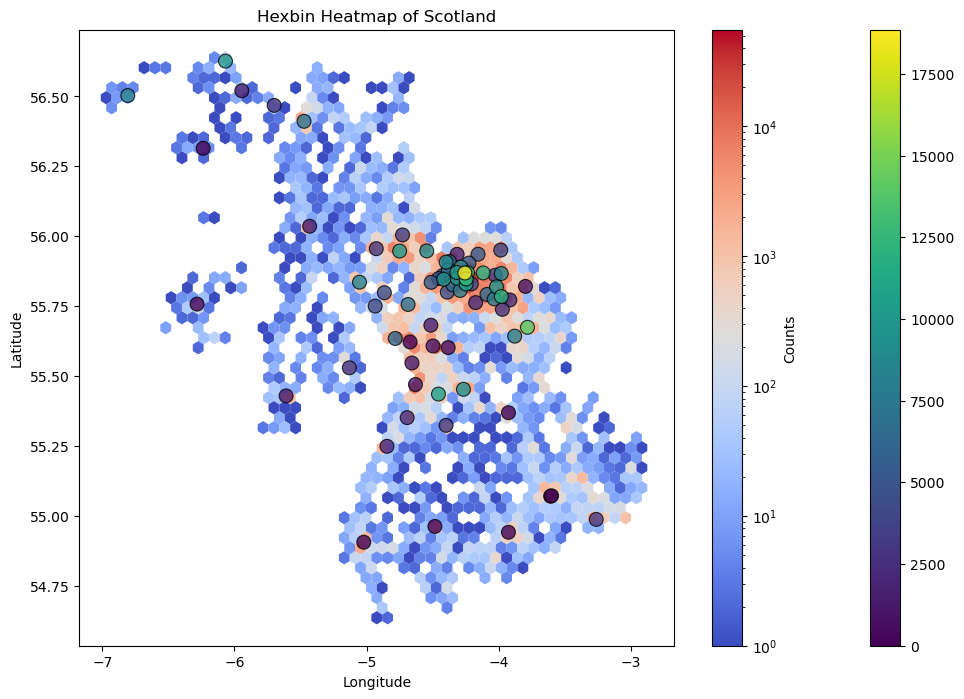

In [25]:
# Create a hexbin plot
# Measuring the model's allocation

# Create a Pandas DataFrame from PS instances
ps_data = {
    'y': [ps.location.y for ps in police_stations],
    'x': [ps.location.x for ps in police_stations],
    'division': [ps.division for ps in police_stations],
    "name":[ps.name for ps in police_stations],
    "simulation_name":[ps.simulation_name for ps in police_stations]
}
ps_df = pd.DataFrame(ps_data)
ps_df["n_resolved"] = n_resolved_by_stations_new.values
ps_df = ps_df.sort_values("n_resolved", ascending=True)

plt.figure(figsize=(12, 8))
hb = plt.hexbin(
    data['longitude'], 
    data['latitude'], 
    gridsize=50,  # Adjust this value for finer/coarser bins
    cmap='coolwarm', 
    mincnt=1,  # Only display bins with at least 1 point
    edgecolors='none',   # Remove hexagon edges for cleaner look
    norm=mpl.colors.LogNorm()
)

# Plot PS points from the DataFrame
ax = sns.scatterplot(x="y", y="x", marker='o', edgecolor='black', s=100,
               data=ps_df, hue="n_resolved", palette="viridis", alpha=0.8)
norm = plt.Normalize(ps_df['n_resolved'].min(), ps_df['n_resolved'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
ax.get_legend().remove()
ax.figure.colorbar(sm)

#for division, group in ps_df.groupby('division'):
#    plt.scatter(group['y'], group['x'], label=division, marker='o', edgecolor='black', s=100)

# Add legend for PS divisions
#plt.legend(title='Division', loc='upper right')

plt.colorbar(hb, label='Counts')
plt.title('Hexbin Heatmap of Scotland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("outcomes/geographical_resolution_incidents_per_ps.png")
plt.show()

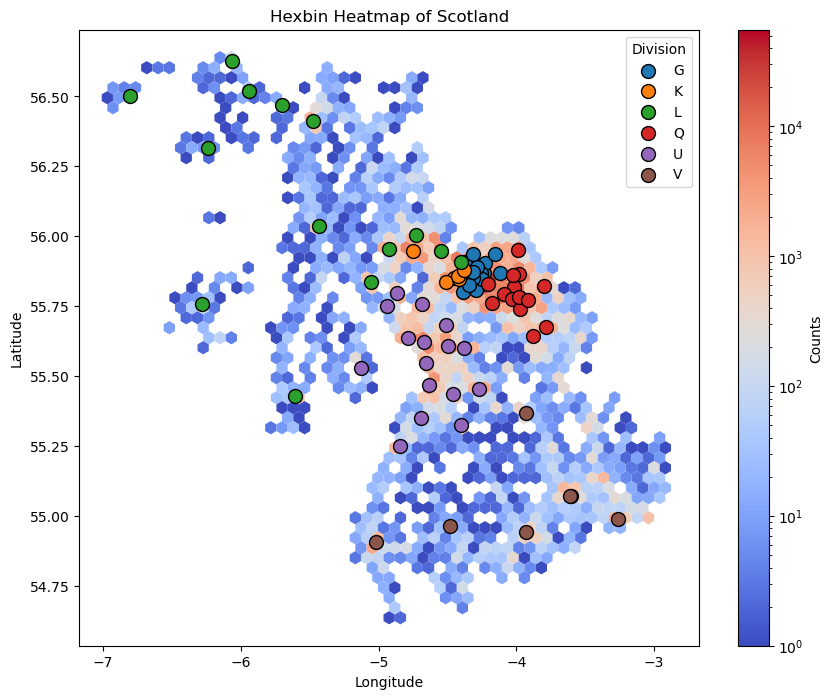

In [26]:
# Create a hexbin plot

# Create a Pandas DataFrame from PS instances
ps_data = {
    'x': [ps.location.y for ps in police_stations],
    'y': [ps.location.x for ps in police_stations],
    'division': [ps.division for ps in police_stations]
}
ps_df = pd.DataFrame(ps_data)

plt.figure(figsize=(10, 8))
hb = plt.hexbin(
    data['longitude'], 
    data['latitude'], 
    gridsize=50,  # Adjust this value for finer/coarser bins
    cmap='coolwarm', 
    mincnt=1,  # Only display bins with at least 1 point
    edgecolors='none',   # Remove hexagon edges for cleaner look
    norm=mpl.colors.LogNorm()
)

# Plot PS points from the DataFrame
for division, group in ps_df.groupby('division'):
    plt.scatter(group['x'], group['y'], label=division, marker='o', edgecolor='black', s=100)
    
    

# Add legend for PS divisions
plt.legend(title='Division', loc='upper right')

plt.colorbar(hb, label='Counts')
plt.title('Hexbin Heatmap of Scotland')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig("outcomes/geographical_resolution_incidents_per_ps_division.png")
plt.show()

In [89]:
ps_df

x          y division
0  -4.236984  55.869542        G
1  -4.390426  55.799930        G
2  -4.226463  55.903822        G
3  -4.248148  55.829003        G
4  -4.257927  55.868494        G
5  -4.374615  55.909411        G
6  -4.119148  55.868617        G
7  -4.293165  55.806008        G
8  -4.247957  55.846999        G
9  -4.317444  55.849062        G
10 -4.157725  55.935602        G
11 -4.287769  55.889432        G
12 -4.316179  55.935420        G
13 -4.347915  55.826095        G
14 -4.318453  55.870298        G
15 -4.455780  55.848759        K
16 -4.512687  55.835116        K
17 -4.417982  55.845967        K
18 -4.424608  55.859237        K
19 -4.383029  55.880155        K
20 -4.751069  55.946982        K
21 -3.982152  55.866632        Q
22 -4.018506  55.818769        Q
23 -4.090560  55.791664        Q
24 -4.027709  55.860641        Q
25 -3.986353  55.950420        Q
26 -4.176252  55.762477        Q
27 -4.035544  55.775782        Q
28 -3.783981  55.674044        Q
29 -3.974087  55.738455        Q
30 -3.880826  55.642510        Q
31 -3.981504  55.784205        Q
32 -4.209015  55.829334        Q
33 -3.799539  55.820524        Q
34 -3.917429  55.771957        Q
35 -4.631451  55.469410        U
36 -4.268462  55.452285        U
37 -4.399812  55.323375        U
38 -4.457434  55.435152        U
39 -4.383814  55.601488        U
40 -4.846872  55.248306        U
41 -4.671835  55.621731        U
42 -4.687107  55.755833        U
43 -4.498482  55.607177        U
44 -5.131520  55.529172        U
45 -4.866430  55.797928        U
46 -4.694089  55.350963        U
47 -4.936184  55.750058        U
48 -4.784264  55.634178        U
49 -4.514793  55.681608        U
50 -4.658128  55.546434        U
51 -3.263925  54.986830        V
52 -3.928039  54.940814        V
53 -3.601948  55.071247        V
54 -3.609086  55.069975        V
55 -4.484344  54.961680        V
56 -3.927867  55.368586        V
57 -5.022334  54.905228        V

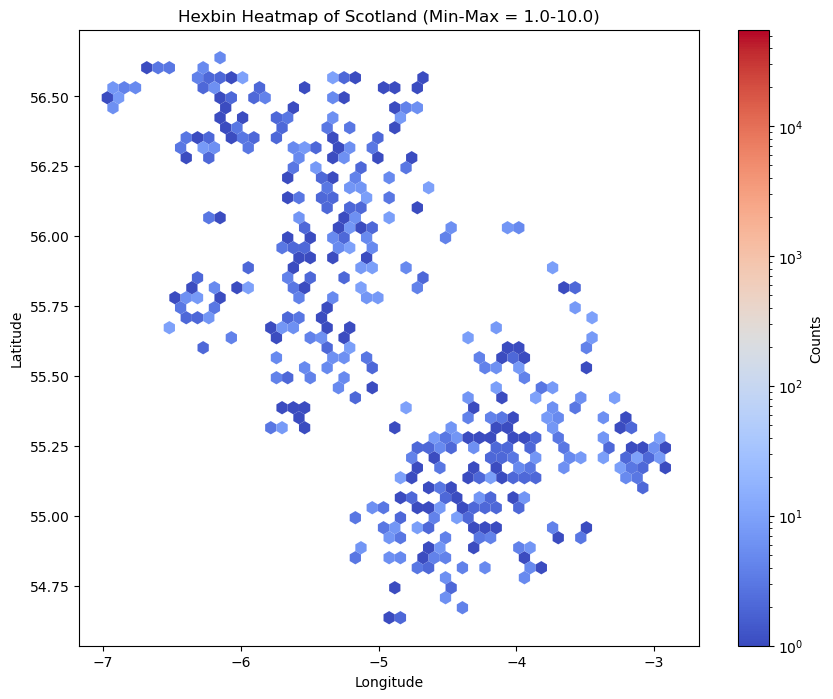

In [31]:
# Set a maximum count threshold for points per hexagon
max_threshold = 1e1
min_threshold = max_threshold/10

plt.figure(figsize=(10, 8))

# Calculate hexbin statistics
hb = plt.hexbin(
    data['longitude'], 
    data['latitude'], 
    gridsize=50,        # Adjust gridsize for finer details
    cmap='coolwarm', 
    mincnt=1,            # Minimum count of points per hexagon
    edgecolors='none',    # Remove hexagon edges for cleaner look
    norm=mpl.colors.LogNorm(),
    #reduce_C_function=lambda counts: np.where(counts > max_threshold, counts, None) 
)

# Get hexagon counts
counts = hb.get_array()
masked_counts = np.where((counts >= min_threshold) & (counts <= max_threshold), counts, 0)

# Normalize counts between 0 and 1
norm = mpl.colors.Normalize(vmin=min_threshold, vmax=max_threshold, clip=False)
#normalized_counts = np.clip(counts, min_theshold, max_threshold)  # Clip counts above max_threshold

# Update the plot with adjusted counts and colormap
hb.set_array(masked_counts)
#hb.set_norm(norm)

plt.colorbar(hb, label='Counts')
plt.title(f'Hexbin Heatmap of Scotland (Min-Max = {min_threshold}-{max_threshold})')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig(f"outcomes/demand_{min_threshold}_{max_threshold}.png")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


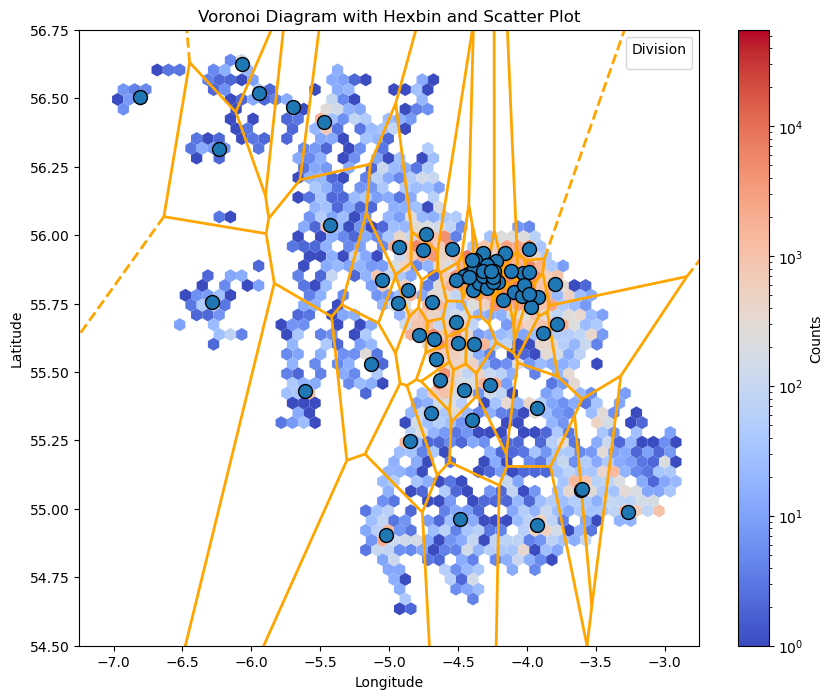

In [32]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

# Assuming police_stations is a list of objects with the required attributes

# Create a Pandas DataFrame from PS instances
ps_data = {
    'y': [ps.location.y for ps in police_stations],
    'x': [ps.location.x for ps in police_stations],
    'division': [ps.division for ps in police_stations],
    "name": [ps.name for ps in police_stations],
    "simulation_name": [ps.simulation_name for ps in police_stations]
}


ps_df = pd.DataFrame(ps_data)
ps_df["n_resolved"] = n_resolved_by_stations_new.values
ps_df = ps_df.sort_values("n_resolved", ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))

# Create Voronoi diagram
points = ps_df[['y', 'x']].values
vor = Voronoi(points)

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False, line_colors='orange', line_width=2)

# Plot original points
#ax.plot(points[:, 0], points[:, 1], 'ro')

# Plot PS points from the DataFrame as scatter plot
ax.scatter(ps_df['y'], ps_df['x'], edgecolor='black', s=100, zorder=10)

# Plot hexbin
hb = ax.hexbin(
    data['longitude'], 
    data['latitude'], 
    gridsize=50,  # Adjust this value for finer/coarser bins
    cmap='coolwarm', 
    mincnt=1,  # Only display bins with at least 1 point
    edgecolors='none',   # Remove hexagon edges for cleaner look
    norm=mpl.colors.LogNorm()
)

# Customize plot
ax.set_title("Voronoi Diagram with Hexbin and Scatter Plot")
ax.legend(title='Division', loc='upper right')

# Add color bar for hexbin
fig.colorbar(hb, ax=ax, label='Counts')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xlim([-7.25, -2.75])
ax.set_ylim([54.5, 56.75])

plt.savefig(f"outcomes/voronoi_diagram.png")
plt.show()